<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/Actividad_1_Febrero_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1: Evaluación de la Eficacia de un Nuevo Fármaco Hipotensor

¡Hola! Bienvenido/a a la primera actividad práctica. En este ejercicio, te pondrás en la piel de un investigador clínico para analizar los resultados de un ensayo.

### Contexto del Caso Clínico

Un laboratorio ha desarrollado un nuevo fármaco, **"TensioRedux"**, para tratar la hipertensión. Para probar su eficacia, se ha realizado un estudio comparándolo con un tratamiento estándar del mercado, **"Estandarol"**, y un **placebo**.

Tu misión es analizar los datos de 90 pacientes para determinar si hay diferencias significativas en la reducción de la presión arterial entre los tres grupos.

### Tus Tareas en este Cuaderno

A lo largo de este cuaderno, encontrarás una serie de ejercicios que te guiarán en el análisis. Deberás:

1.  **Preparar los datos**: Calcular la variable de interés.
2.  **Análisis Descriptivo**: Resumir los datos de cada grupo.
3.  **Verificación de Supuestos**: Comprobar si los datos cumplen las condiciones para realizar un ANOVA.
4.  **Análisis Inferencial**: Realizar la prueba estadística principal (ANOVA o su alternativa no paramétrica).
5.  **Análisis Post-Hoc**: Si encuentras diferencias, identificar exactamente entre qué grupos se producen.
6.  **Reflexión**: Responder a una pregunta final que te invitará a pensar más allá de los números, considerando la relevancia clínica de tus hallazgos.

Este cuaderno es una parte fundamental del **Entregable 1**. ¡Manos a la obra!

-----

### ✍️ Cómo Responder a las Preguntas y Darle Estilo a tu Texto

A lo largo de este cuaderno, te encontrarás con algunas "Preguntas de Reflexión" 🤔. ¡No te asustes\! Son una parte crucial de tu aprendizaje, ya que nos permiten ver cómo aplicas tu pensamiento crítico a los resultados.

Para responder, solo tienes que crear tus propias celdas de texto. ¡Verás qué fácil es\!

-----

### \#\# ✅ Creando una Nueva Celda de Texto

Para añadir tu respuesta, puedes crear una celda de texto de dos maneras:

  * Haz clic en el botón **`+ Texto`** que aparece en la esquina superior izquierda de Colab.
  * Mueve el ratón entre dos celdas hasta que aparezca el menú mágico con los botones **`+ Código`** y **`+ Texto`**, y haz clic en este último.

-----

### \#\# ✨ Dando Formato a tus Respuestas con Markdown

Una vez creada tu celda de texto, puedes usar **Markdown**, un lenguaje de formato súper sencillo, para que tus respuestas se vean organizadas y profesionales. Para empezar a escribir o editar, solo tienes que hacer doble clic en la celda.

Aquí tienes algunos trucos muy útiles:

#### \#\#\# Títulos y Subtítulos

Usa el símbolo `#` para crear títulos. Cuantos más `#` uses, más pequeño será el subtítulo.

**Por ejemplo, si escribes:**

```markdown
# Respuesta a la Reflexión del Caso 1
## Análisis de Significación Estadística vs. Relevancia Clínica
### Factores Adicionales a Considerar
```

**Obtendrás esto:**

# Respuesta a la Reflexión del Caso 1

## Análisis de Significación Estadística vs. Relevancia Clínica

### Factores Adicionales a Considerar

-----

#### \#\#\# Negrita y Cursiva

Usa asteriscos `*` para darle énfasis a tus palabras.

  * Para la **negrita**, envuelve el texto con dos asteriscos: `**texto en negrita**`.
  * Para la *cursiva*, envuelve el texto con un asterisco: `*texto en cursiva*`.

-----

#### \#\#\# Listas

Puedes crear listas con viñetas muy fácilmente. Solo tienes que empezar cada línea con un asterisco `*` o un guion `-`.

**Por ejemplo, si escribes:**

```markdown
* Primer punto clave: La diferencia no es estadísticamente significativa.
* Segundo punto clave: La relevancia clínica podría ser importante.
    * Un pequeño beneficio podría justificar el coste si los efectos secundarios son menores.
```

**Obtendrás esto:**

  * Primer punto clave: La diferencia no es estadísticamente significativa.
  * Segundo punto clave: La relevancia clínica podría ser importante.
      * Un pequeño beneficio podría justificar el coste si los efectos secundarios son menores.

-----

#### \#\#\# Insertar un Enlace (Link)

Si quieres citar un artículo o una página web, ¡puedes crear un enlace\!

**La sintaxis es:** `[Texto que quieres mostrar](URL)`

**Por ejemplo, si escribes:**

```markdown
Según la documentación del [dataset Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), la variable objetivo tiene 5 niveles.
```

**Obtendrás esto:**

Según la documentación del [dataset Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), la variable objetivo tiene 5 niveles.

-----

#### \#\# 💡 ¡Un último truco\!

Cuando termines de escribir, pulsa **`Shift + Enter`** o haz clic fuera de la celda para ver la magia de Markdown en acción. Si necesitas hacer cambios, ¡solo tienes que volver a hacer doble clic\!

In [3]:
# ------------------------------------------------------------------------------
# CELDA 2: CÓDIGO (GENERACIÓN Y CARGA DEL DATASET)
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# --- Generación de Datos Sintéticos ---
# Para garantizar la reproducibilidad, fijamos una semilla aleatoria.
np.random.seed(42)

# Número de pacientes por grupo
n_pacientes = 30

# Creación de los grupos
grupos = ['Placebo'] * n_pacientes + ['Estandarol'] * n_pacientes + ['TensioRedux'] * n_pacientes

# Generación de IDs de paciente
paciente_ids = [f'P{i:03d}' for i in range(1, n_pacientes * 3 + 1)]

# Simulación de la Presión Arterial Sistólica (PAS) inicial
# Asumimos que todos los pacientes parten de una condición similar de hipertensión leve.
pas_inicial_placebo = np.random.normal(loc=155, scale=8, size=n_pacientes)
pas_inicial_estandarol = np.random.normal(loc=154, scale=8, size=n_pacientes)
pas_inicial_tensioredux = np.random.normal(loc=156, scale=8, size=n_pacientes)
pas_inicial = np.concatenate([pas_inicial_placebo, pas_inicial_estandarol, pas_inicial_tensioredux])

# Simulación de la reducción de PAS (el efecto del tratamiento)
# Placebo: efecto mínimo, centrado en 2 mmHg.
reduccion_placebo = np.random.normal(loc=2, scale=3, size=n_pacientes)
# Estandarol: efecto moderado, centrado en 10 mmHg.
reduccion_estandarol = np.random.normal(loc=10, scale=4, size=n_pacientes)
# TensioRedux: efecto superior, centrado en 15 mmHg.
reduccion_tensioredux = np.random.normal(loc=15, scale=5, size=n_pacientes)

# Calculamos la PAS final
pas_final_placebo = pas_inicial_placebo - reduccion_placebo
pas_final_estandarol = pas_inicial_estandarol - reduccion_estandarol
pas_final_tensioredux = pas_inicial_tensioredux - reduccion_tensioredux
pas_final = np.concatenate([pas_final_placebo, pas_final_estandarol, pas_final_tensioredux])

# Creación del DataFrame
df = pd.DataFrame({
    'paciente_id': paciente_ids,
    'grupo_tratamiento': grupos,
    'PAS_inicial': pas_inicial.round(1),
    'PAS_final': pas_final.round(1)
})

# Mezclar el DataFrame para que los grupos no aparezcan en orden
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# --- Muestra de los datos cargados ---
print("Datos del ensayo clínico cargados correctamente.")
print("A continuación se muestran las primeras 5 filas del dataset:")
display(df.head())

Datos del ensayo clínico cargados correctamente.
A continuación se muestran las primeras 5 filas del dataset:


,paciente_id,grupo_tratamiento,PAS_inicial,PAS_final
0,P041,Estandarol,159.9,156.1
1,P023,Placebo,155.5,153.4
2,P056,Estandarol,161.5,148.3
3,P071,TensioRedux,158.9,148.8
4,P001,Placebo,159.0,156.7



### 💡 Consejo: Cómo usar la IA (Gemini) para ayudarte

A lo largo de esta actividad, puedes usar herramientas de IA como Gemini para que te asistan en la generación de código. La clave es ser específico en tu petición. Recuerda siempre **entender, verificar y adaptar** el código que te proporcione la IA. Tú eres el investigador/a final.

**Ejemplo de un buen prompt para Gemini:**

> Actúa como un científico de datos experto en bioestadística usando Python y la librería `scipy.stats`.
>
> Tengo un DataFrame de pandas llamado `df_act1` que contiene los resultados de un ensayo clínico. Este DataFrame tiene una columna categórica llamada `grupo_tratamiento` (con los valores 'Placebo', 'Estandarol', 'TensioRedux') y una columna numérica llamada `reduccion_PAS`.
>
> Necesito verificar el supuesto de normalidad para un análisis ANOVA. Por favor, escribe un script en Python que:
> 1.  Itere a través de cada grupo de tratamiento único en el DataFrame.
> 2.  Para cada grupo, aplique la prueba de normalidad de Shapiro-Wilk a los datos de la columna `reduccion_PAS`.
> 3.  Imprima de forma clara el nombre del grupo, el estadístico de la prueba y el p-valor resultante.


In [ ]:
# --- EJEMPLO DE ANÁLISIS DESCRIPTIVO BÁSICO CON IA ---

# A continuación, te mostramos un ejemplo de lo que podrías obtener de Gemini
# con un prompt muy general. Observa que el análisis es correcto, pero superficial.
# No ejecutes este código directamente. Úsalo como inspiración para crear tu propio
# prompt mejorado en una nueva celda de código más abajo.

# ---
# PROMPT BÁSICO ENVIADO A GEMINI:
#
# "Actúa como un analista de datos.
# Tengo un DataFrame de pandas llamado `df_act1`. Ya he calculado una nueva
# columna llamada `reduccion_PAS` que es `PAS_inicial` - `PAS_final`.
# Por favor, realiza un análisis estadístico descriptivo básico del DataFrame
# y algunas visualizaciones generales para entender los datos."
# ---


##🧠 Tu Papel como Investigador:
 ¡Analicemos la Respuesta de la IA!
Para que veas cómo funciona en la práctica la interacción con una herramienta de inteligencia artificial, hemos hecho una primera consulta a Gemini. Le dimos una petición (un prompt) bastante general, simplemente copiando y pegando esto:

**Actúa como un analista de datos.
Tengo un DataFrame de pandas llamado df_act1. Ya he calculado una nueva
columna llamada reduccion_PAS que es PAS_inicial - PAS_final.
Por favor, realiza un análisis estadístico descriptivo básico del DataFrame
y algunas visualizaciones generales para entender los datos.**

El código que verás en la siguiente celda es la respuesta que nos dio Gemini, ¡directa y sin filtros!

👉 Tu Misión: ¡A Pensar como un Experto!
Ahora empieza tu misión, que no es escribir este código, sino ponerte en el papel de un/a investigador/a experto/a.

Ejecuta el código: Simplemente dale al "play" ▶️ en la celda de abajo para ver los resultados que ha generado la IA.

Analiza los resultados con ojo crítico: Una vez que veas los gráficos y las tablas, pregúntate:

¿Este análisis es suficiente?

¿Responde a la pregunta clave de nuestro estudio (saber si el fármaco funciona)?

¿Qué información crucial crees que falta? Por ejemplo, ¿la IA ha comparado los grupos de tratamiento o ha analizado todos los datos juntos sin hacer distinciones?

Reflexiona sobre cómo mejorar la petición (el prompt):

¿Por qué crees que la IA nos dio una respuesta tan general?

¿Cómo reescribirías tú la petición inicial para obtener un análisis que sea verdaderamente útil para comparar la eficacia de los tres tratamientos?

Esta reflexión es una parte fundamental de tu aprendizaje y de esta actividad. Demuestra que tienes el conocimiento necesario para guiar a la herramienta. Recuerda: un buen análisis no depende solo de la inteligencia artificial, sino de la capacidad del investigador para formular las preguntas correctas y específicas.

Cuanto más sepas de bioestadística, mejores superpoderes 🦸‍♀️ le darás a tus prompts para descubrir cosas asombrosas en los datos. ¡Tú eres quien guía la investigación!

DataFrame con la nueva columna 'reduccion_PAS':


,paciente_id,grupo_tratamiento,PAS_inicial,PAS_final,reduccion_PAS
0,P041,Estandarol,159.9,156.1,3.8
1,P023,Placebo,155.5,153.4,2.1
2,P056,Estandarol,161.5,148.3,13.2
3,P071,TensioRedux,158.9,148.8,10.1
4,P001,Placebo,159.0,156.7,2.3



Análisis estadístico descriptivo de 'reduccion_PAS' por grupo de tratamiento:


,count,mean,std,min,25%,50%,75%,max
grupo_tratamiento,,,,,,,,
Estandarol,30.0,9.630000,4.083706,3.6,6.150,10.35,12.325,18.7
Placebo,30.0,1.930000,2.729551,-3.8,0.825,1.90,2.850,9.4
TensioRedux,30.0,16.383333,4.731413,9.1,12.125,16.45,19.050,28.6


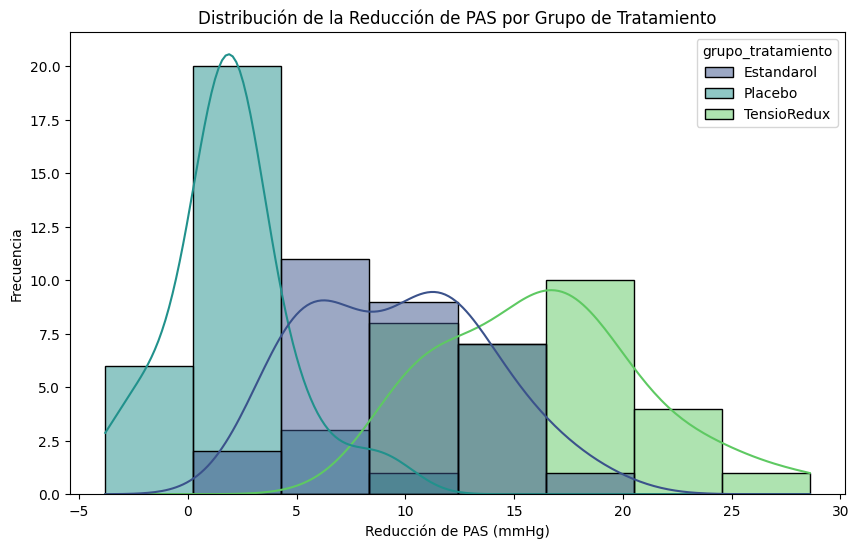

In [6]:
# --- EJERCICIO 1: PREPARACIÓN DE DATOS Y ANÁLISIS DESCRIPTIVO ---

# 1. Preparar los datos: Calcular la variable de interés.
# La variable de interés es la reducción de la Presión Arterial Sistólica (PAS).
df['reduccion_PAS'] = df['PAS_inicial'] - df['PAS_final']

print("DataFrame con la nueva columna 'reduccion_PAS':")
display(df.head())

# 2. Análisis Descriptivo: Resumir los datos de cada grupo.
print("\nAnálisis estadístico descriptivo de 'reduccion_PAS' por grupo de tratamiento:")
display(df.groupby('grupo_tratamiento')['reduccion_PAS'].describe())

# Visualización general: Histograma de la reducción de PAS por grupo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='reduccion_PAS', hue='grupo_tratamiento', kde=True, palette='viridis')
plt.title('Distribución de la Reducción de PAS por Grupo de Tratamiento')
plt.xlabel('Reducción de PAS (mmHg)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# AÑADE EL CÓDIGO AQUÍ, UTILIZA LAS CELDAS QUE NECESITES
# ------------------------------------------------------------------------------

# Ejercicio 2: Modelo Predictivo para el Diagnóstico de Enfermedad Coronaria

En esta segunda actividad, cambiarás de rol para convertirte en un científico de datos que trabaja en un problema de diagnóstico clínico.

### Contexto del Caso Clínico

La enfermedad coronaria es una de las principales causas de mortalidad en el mundo. [1] Un diagnóstico temprano y preciso es crucial. Utilizarás un conjunto de datos clásico en la investigación médica, el **"Heart Disease UCI dataset"**, para construir y comparar dos modelos de clasificación. [2, 3]

Tu objetivo es predecir si un paciente tiene o no enfermedad coronaria basándote en variables clínicas y de laboratorio.

### Tus Tareas en este Cuaderno

1.  **Carga y Preparación de Datos**: Cargarás el dataset y lo prepararás para el modelado.
2.  **División de Datos**: Separarás los datos en conjuntos de entrenamiento y prueba.
3.  **Modelado**: Entrenarás un modelo de Análisis Lineal Discriminante (LDA) y otro de Regresión Logística.
4.  **Evaluación**: Compararás el rendimiento de ambos modelos utilizando métricas clave como la matriz de confusión, precisión y sensibilidad.
5.  **Reflexión**: Al igual que en la actividad anterior, finalizarás con una reflexión sobre las implicaciones de tu elección de modelo en un entorno clínico real.

¡Continuemos con este interesante desafío!
"""

In [4]:
# ------------------------------------------------------------------------------
# CELDA 5: CÓDIGO (CARGA DEL DATASET - ACTIVIDAD 2)
# ------------------------------------------------------------------------------
# --- URL del dataset desde el repositorio de UCI ---
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# --- Nombres de las columnas (según la documentación del dataset) ---
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# --- Carga de datos usando pandas ---
# El dataset usa '?' para los valores faltantes. Los cargamos como NaN para poder manejarlos.
df_act2 = pd.read_csv(url, header=None, names=column_names, na_values='?')

# --- Preprocesamiento Básico ---
# 1. Eliminar filas con cualquier valor faltante (es una estrategia simple y efectiva para este dataset)
df_act2.dropna(inplace=True)

# 2. Convertir la variable objetivo a un formato binario
# Originalmente: 0 = sin enfermedad, 1-4 = diferentes grados de enfermedad.
# Tarea: convertir a 0 = sin enfermedad, 1 = con enfermedad.
df_act2['target'] = (df_act2['target'] > 0).astype(int)

# --- Muestra de los datos cargados ---
print("\n--- ACTIVIDAD 2 ---")
print("Datos de 'Heart Disease UCI' cargados y preprocesados correctamente.")
print("A continuación se muestran las primeras 5 filas del dataset:")
display(df_act2.head())
print("\nInformación del DataFrame resultante:")
df_act2.info()


--- ACTIVIDAD 2 ---
Datos de 'Heart Disease UCI' cargados y preprocesados correctamente.
A continuación se muestran las primeras 5 filas del dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Información del DataFrame resultante:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [ ]:
# ------------------------------------------------------------------------------
# AÑADE EL CÓDIGO AQUÍ, UTILIZA LAS CELDAS QUE NECESITES
# ------------------------------------------------------------------------------


---
# Actividad 3: Identificación de Factores Pronósticos en Cáncer de Mama

Llegamos a la tercera y última actividad práctica. Aquí, te adentrarás en el campo de la oncología y el machine learning para construir un modelo de diagnóstico de alta precisión.

### Contexto del Caso Clínico

La distinción entre tumores de mama benignos y malignos es un paso crítico en el diagnóstico del cáncer. El análisis cuantitativo de las características de los núcleos celulares, extraídas de imágenes de biopsias, puede ayudar a objetivar este proceso. [4, 5]

Utilizarás el famoso dataset **"Breast Cancer Wisconsin (Diagnostic)"** para construir un modelo de clasificación y, lo que es más importante, para identificar qué características celulares son las más determinantes para el diagnóstico.

### Tus Tareas en este Cuaderno

1.  **Preprocesamiento de Datos**: Prepararás los datos para que sean compatibles con los algoritmos de machine learning.
2.  **Modelado con Random Forest**: Construirás un modelo de clasificación robusto y lo evaluarás mediante validación cruzada.
3.  **Evaluación del Modelo**: Analizarás el rendimiento del modelo usando métricas como la curva ROC y el AUC.
4.  **Interpretación del Modelo**: Extraerás y visualizarás la importancia de las características para entender qué factores son más predictivos.
5.  **Reflexión**: Formularás nuevas hipótesis de investigación basadas en los hallazgos de tu modelo, conectando la estadística con la biología.

¡Vamos a por el último análisis!


In [5]:
from sklearn.datasets import load_breast_cancer

# --- Carga de datos usando scikit-learn ---
# Esta función carga el dataset como un objeto 'Bunch', que contiene los datos y metadatos.
cancer_dataset = load_breast_cancer()

# --- Creación del DataFrame ---
# Creamos el DataFrame con las 30 variables predictoras.
df_act3 = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)

# Añadimos la variable objetivo ('diagnosis') al DataFrame.
# En el dataset original de sklearn, 0 es maligno y 1 es benigno.
# Lo recodificamos para que sea más intuitivo: 1 = Maligno, 0 = Benigno.
df_act3['diagnosis'] = (cancer_dataset.target == 0).astype(int)


# --- Muestra de los datos cargados ---
print("\n--- ACTIVIDAD 3 ---")
print("Datos de 'Breast Cancer Wisconsin (Diagnostic)' cargados correctamente.")
print("A continuación se muestran las primeras 5 filas del dataset:")
display(df_act3.head())
print("\nInformación del DataFrame resultante:")
df_act3.info()


--- ACTIVIDAD 3 ---
Datos de 'Breast Cancer Wisconsin (Diagnostic)' cargados correctamente.
A continuación se muestran las primeras 5 filas del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1



Información del DataFrame resultante:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    

In [ ]:
# ------------------------------------------------------------------------------
# AÑADE EL CÓDIGO AQUÍ, UTILIZA LAS CELDAS QUE NECESITES
# ------------------------------------------------------------------------------

##🚀 ¡Último Paso! Prepara tu Entrega en PDF
¡Felicidades! Has llegado al final de la parte práctica. El último paso es generar un documento PDF con todo tu trabajo (código, salidas y respuestas) para poder entregarlo.

La siguiente celda de código está preparada para hacer toda la magia por ti. Aquí te explicamos lo que hace y cómo usarla:

1. Preparando las Herramientas Mágicas 🧙‍♂️
La primera parte del código instala las librerías necesarias para convertir tu cuaderno a PDF. Este proceso solo se hace una vez y puede tardar unos minutos, ¡así que tenle un poco de paciencia mientras se toma un café ☕️!

2. ¡Acción Requerida! Tus Pasos a Seguir
Antes de ejecutar la celda, solo tienes que hacer dos cosas muy importantes:

✅ Primero: Guarda tu cuaderno. Es fundamental que guardes tu trabajo para que la versión en PDF incluya todos tus últimos cambios. Puedes usar el atajo Ctrl+S o ir a Archivo > Guardar.

✅ Segundo: Edita la línea final del código. La última línea es la que hace la conversión, pero está "comentada" con un # para que no se ejecute por accidente.

Descoméntala: Simplemente borra el símbolo # del principio.

Añade el nombre de tu archivo: Reemplaza el texto "Nombre_de_tu_cuaderno.ipynb" por el nombre real de este cuaderno. Lo puedes ver en la parte superior de la pestaña de tu navegador.

¡Y listo! Cuando la celda termine de ejecutarse, tu PDF aparecerá en el panel de archivos a la izquierda. ¡Ya solo queda descargarlo y entregarlo! 🎉

In [ ]:
# ------------------------------------------------------------------------------
# CÓDIGO (EXPORTAR A PDF)
# ------------------------------------------------------------------------------
# --- Exportar el Cuaderno a PDF ---
# Esta celda contiene el código para convertir tu trabajo en un fichero PDF.
# Puede tardar unos minutos en ejecutarse la primera vez.

# Paso 1: Instalar las dependencias necesarias.
# Esto instala las herramientas para convertir cuadernos y las librerías de LaTeX.
print("Instalando dependencias para la conversión a PDF...")
!apt-get update > /dev/null
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc -y > /dev/null
!pip install nbconvert[webpdf] > /dev/null
print("Instalación completada.")

# Paso 2: Guardar el cuaderno actual.
# ¡IMPORTANTE! Asegúrate de guardar tu cuaderno (Ctrl+S o Archivo > Guardar)
# antes de ejecutar esta celda para que se incluyan todos tus cambios.

# Paso 3: Convertir el cuaderno a PDF.
# Reemplaza "Nombre_de_tu_cuaderno.ipynb" con el nombre exacto de este fichero.
# Puedes ver el nombre en la parte superior izquierda de la pantalla de Colab.
print("\nIniciando la conversión a PDF...")
# --- ¡ATENCIÓN! MODIFICA LA LÍNEA DE ABAJO Elimina simplemente "#"---
#!jupyter nbconvert --to pdf "Nombre_de_tu_cuaderno.ipynb"

print("\nConversión finalizada. Busca el archivo PDF en el panel de archivos a la izquierda.")
print("NOTA: La línea de conversión está comentada para evitar errores. Descoméntala y añade el nombre de tu archivo para usarla.")